In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pyscf
from pyscf import gto,dft,scf

# import neuralxc
# from neuralxc.projector.pyscf import get_eri3c as get_mlovlp
import torch
torch.set_default_dtype(torch.double)
import pyscf
from pyscf import gto,dft,scf

import numpy as np
import scipy
from ase import Atoms
from ase.io import read, write
from dpyscf.net import * 
from dpyscf.torch_routines import * 
from dpyscf.utils import *
from dpyscf.losses import *
from pyscf.cc import CCSD
from functools import partial
from ase.units import Bohr,Hartree
%pylab inline


# torch.cuda.current_device()
# torch.cuda.is_available()
# torch.cuda.get_device_name(0)

# ML_BASIS = 'basis-p'
DEVICE = 'cpu'

Populating the interactive namespace from numpy and matplotlib


/gpfs/home/smdick/miniconda3/envs/torch/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['eig', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
atoms = read('../data/haunschild_pbe.traj',':')
indices = np.arange(len(atoms)).tolist()

In [11]:
atoms

[Atoms(symbols='N2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='LiF', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='F2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='OC', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C', pbc=False),
 Atoms(symbols='Cl', pbc=False),
 Atoms(symbols='F', pbc=False),
 Atoms(symbols='H', pbc=False),
 Atoms(symbols='Li', pbc=False),
 Atoms(symbols='N', pbc=False),
 Atoms(symbols='Na', pbc=False),
 Atoms(symbols='O', pbc=False),
 Atoms(symbols='NO2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='NH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='O3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='N2O', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CH2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='

In [12]:
atoms[0].info

{'N2': True, 'name': 'Dinitrogen', 'n_rad': 6, 'n_ang': 10, 'pol': False}

In [13]:
testing = read('../data/haunschild_g2/g2_97.traj',':')

In [62]:
indices = [23, 84, 144, 21, 116, 106, 50, 15, 58]

In [63]:
to_add = [testing[i] for i in indices]

In [64]:
to_add

[Atoms(symbols='NO2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='NH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='O3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='N2O', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CH2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='SiH4', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='OH2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='NH3', pbc=False, calculator=SinglePointCalculator(...))]

In [11]:
to_add[0].info

{'NO2': True, 'name': 'Nitrogen dioxide', 'openshell': True}

In [18]:
[a.get_potential_energy()/Hartree for a in to_add]

[0.36339749810529004,
 0.132172937629701,
 0.2345382154735096,
 0.43180352541868494,
 0.4902723965371663,
 0.3036488705738187,
 0.5172006043938313,
 0.3713350349049067,
 0.47457252768494956]

In [12]:
for a in to_add:
    a.info.update({'sc': False, 'sym':False, 'n_rad':1, 'grid_level':1, 'pol': a.info['openshell']})
    atoms.append(a)

In [3]:
atoms

NameError: name 'atoms' is not defined

In [34]:
write('../data/haunschild_pbe_extended.traj', atoms)

In [4]:
atoms = read('../data/haunschild_pbe_extended.traj',':')

In [5]:
atoms

[Atoms(symbols='H2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='N2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='LiF', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CNH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CO2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='Cl2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='F2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='O2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='OC', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='ClH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='LiH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='Na2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C', pbc=False),
 Atoms(symbols='Cl', pb

In [32]:
atoms.pop(-3)

Atoms(symbols='SiH4', pbc=False, calculator=SinglePointCalculator(...))

In [33]:
atoms

[Atoms(symbols='H2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='N2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='LiF', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CNH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='CO2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='Cl2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='F2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='O2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='OC', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='ClH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='LiH', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='Na2', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C', pbc=False),
 Atoms(symbols='Cl', pb

In [27]:
atoms[7].info.update({'openshell':True,'pol':True,'spin':2,'sym':False,'sc':False})

In [40]:
for i, a in enumerate(atoms):
    atoms[i].info['n_rad'] = 1
    if len(a.positions) == 1:
        atoms[i].info['grid_level'] = 1
atoms[2].info['n_rad'] = 2
atoms[2].info['n_ang'] = 20
atoms[8].info['n_rad'] = 2
atoms[10].info['n_rad'] = 2

In [41]:
write('../data/haunschild_pbe.traj',atoms)

In [54]:
pbe_ext = read('../data/haunschild_pbe_extended.traj','-8:')

In [60]:
write('../data/haunschild_scan_extended.traj', read('../data/haunschild_scan.traj',':') + pbe_ext)

In [42]:
pol ={'Be':True, 'HBeH':True, 'FF':False,'OCO':True,'ClCl':True, 'OO':True}
pol = {}

In [43]:
# select = [0, 1, 2, 3, 4, 6, 8, 9, 10,11]
select = [-8, -7, -6, -5, -4, -3, -2]
# select = [2]
# select = [9, 13]
# select = [7]
# select = [9]
# select = [0,14]
# select = [4]
atoms = [atoms[sel] for sel in select]
indices = [indices[sel] for sel in select] 

In [50]:
atoms_new = read('../data/haunschild_g2/g2_97.traj','107:109')
indices = [0]
pol = {}
# atoms[0].info['spin'] = 2

In [51]:
atoms_new[0].info.update({'pol':True, 'grid_level':1, 'sym':False, 'radical':True})
atoms_new[1].info.update({'pol':True, 'grid_level':1, 'sym':False, 'radical':True})

In [52]:
from ase.ui

SyntaxError: invalid syntax (<ipython-input-52-c29b4b12fdb6>, line 1)

In [53]:
atoms_new[1].get_potential_energy()/Hartree

0.13391736750216957

In [54]:
atoms = read('../data/haunschild_pbe_extended.traj',':')

In [55]:
write('../data/haunschild_pbe_radical.traj', atoms + atoms_new)

In [56]:
atoms = read('../data/haunschild_scan_extended.traj',':')
write('../data/haunschild_scan_radical.traj', atoms + atoms_new)

In [57]:
write('../data/radicals.traj',atoms_new)

In [27]:
atoms[0].info

{'H2': True, 'name': 'Dihydrogen', 'n_rad': 1, 'n_ang': 10, 'pol': False}

In [21]:
atoms

[Atoms(symbols='CH', pbc=False, calculator=SinglePointCalculator(...))]

In [22]:
atoms[0].info

{'CH': True, 'name': 'Methylidyne radical', 'openshell': True}

In [24]:
basis = '6-311++G(3df,2pd)'
# basis = '6-311++G*'
# basis = 'aug-ccpvqz'
# basis ='3-21G'
# basis = '6-311+G*'
# basis = '6-311+G*'
# basis = '6-311++G**'
# basis = 'ccpvdz**'


distances = np.arange(len(atoms))

# baseline = [get_datapoint(d, basis=d.info.get('basis',basis), grid_level=d.info.get('grid_level', 4),
#                           xc='PBE',zsym=d.info.get('sym',True),
#                           n_rad=d.info.get('n_rad',30), n_ang=d.info.get('n_ang',15), 
#                           init_guess=False, spin = d.info.get('spin',0), 
#                           pol=pol.get(''.join(d.get_chemical_symbols()), False), do_fcenter=False) for idx, d in zip(indices, atoms)]

# baseline = [get_datapoint(d, basis=d.info.get('basis',basis), grid_level=d.info.get('grid_level', 4),zsym=d.info.get('sym',True),
#                           xc='PBE',n_rad=d.info.get('n_rad',45), n_ang=d.info.get('n_ang',15), 
#                           init_guess=False, spin = d.info.get('spin',0), 
#                           pol=pol.get(''.join(d.get_chemical_symbols()), False), do_fcenter=False) for idx, d in zip(indices, atoms)]
# baseline = [get_datapoint(d, basis=d.info.get('basis',basis), grid_level=d.info.get('grid_level',7),
#                           xc='PBE',zsym=d.info.get('sym', True),
#                           n_rad=d.info.get('n_rad',2), n_ang=d.info.get('n_ang',15), 
# #                           n_rad=2, n_ang=20, 
#                           init_guess=False, spin = d.info.get('spin',0), 
#                           pol=pol.get(''.join(d.get_chemical_symbols()), False), do_fcenter=False,
#                           ref_path='../data/ref/6-311/', ref_index= idx,ref_basis='6-311++G(3df,2pd)') for idx, d in zip(indices, atoms)]

baseline = [get_datapoint(d, basis=basis, grid_level=1,
                          xc='PBE',zsym=d.info.get('sym', False),
#                           n_rad=d.info.get('n_rad',2), n_ang=d.info.get('n_ang',15), 
                          n_rad=2, n_ang=20, 
                          init_guess=False, spin = d.info.get('spin',0), 
                          pol=pol.get(''.join(d.get_chemical_symbols()), False), do_fcenter=False,
                          ref_path='../data/ref/6-311/', ref_index= idx,ref_basis='6-311++G(3df,2pd)') for idx, d in zip(indices, atoms)]
# baseline = [get_datapoint(d, basis=d.info.get('basis',basis), grid_level=d.info.get('grid_level', 5),
#                           xc='wb97mv',zsym=d.info.get('sym',True),
#                           n_rad=d.info.get('n_rad',30), n_ang=d.info.get('n_ang',15), 
#                           init_guess=False, spin = d.info.get('spin',0), 
#                           pol=pol.get(''.join(d.get_chemical_symbols()), False), do_fcenter=False) for idx, d in zip(indices, atoms)]

E_base =  [r[0] for r in baseline]
DM_base = [r[1] for r in baseline]
inputs = [r[2] for r in baseline]
inputs = {key: [i.get(key,None) for i in inputs] for key in inputs[0]}

DM_ref = DM_base
E_ref = E_base

Atoms(symbols='CH', pbc=False, calculator=SinglePointCalculator(...))
6-311++G(3df,2pd)
converged SCF energy = -38.4289681580037  <S^2> = 0.75294916  2S+1 = 2.002947
Loading reference density
converged SCF energy = -38.4289681580037  <S^2> = 0.75294916  2S+1 = 2.002947


AssertionError: 

In [62]:
-38.4289700721354 

-76.3780804577075

In [10]:
dataset = Dataset(Etot = E_ref, dm = DM_ref, **inputs)

train_idx = np.arange(len(distances))
# train_idx = [0]
inputs_train = {key: [inputs[key][idx] for idx in train_idx] for key in inputs}
E_ref_train = [E_ref[i] for i in train_idx]
DM_ref_train = [DM_ref[i] for i in train_idx]
dataset_train = Dataset(Etot = E_ref_train, dm = DM_ref_train, **inputs_train)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False) # Dont change batch size !
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=1, shuffle=False) # Dont change batch size !

train_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
atoms = read('../data/haunschild_scan_extended.traj',':')
#     atoms = read(dpyscf_dir + '/data/haunschild_pbe.traj',':')
# atoms = read(dpyscf_dir + '/data/haunschild_test.traj',':')
indices = np.arange(len(atoms)).tolist()
xctype = 'SCAN'
HYBRID=False
if xctype == 'GGA':
#         pop = [12, 8, 7,  5, 4]
    pop = [12, 8, 7,  5, 4]
    if HYBRID:
    #              pop = [29, 28, 27, 26, 25, 24, 23, 22, 21, 12, 7,  5, 2] # (Hybrid GGA)
        pop = [21, 12, 7,  5, 2] # (Hybrid GGA)
else:
    pop = [21, 12, 11, 10, 8, 7, 5, 4, 3, 0] # (Meta-GGA)
#         pop = [ 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 1, 0] # (Meta-GGA)
# pop = []
[atoms.pop(i) for i in pop]
[indices.pop(i) for i in pop]
dataset = MemDatasetRead('/gpfs/scratch/smdick/.data_scan_extended', skip=pop)

dataset_train = dataset

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False) # Dont change batch size !
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=1, shuffle=False) # Dont change batch size !

In [4]:
molecules = {'{:3d}'.format(idx) + ''.join(a.get_chemical_symbols()): [idx] for idx, a in enumerate(atoms) if len(a.positions) > 1 }
pure_atoms = {''.join(a.get_chemical_symbols()): [idx] for idx, a in enumerate(atoms) if len(a.positions) == 1 }

def split(el):
        import re
        res_list = [s for s in re.split("([A-Z][^A-Z]*)", el) if s]
        return res_list

for molecule in molecules:
    comp = []
    for a in split(molecule[3:]):
        comp.append(pure_atoms[a][0])
    molecules[molecule] += comp

a_count = {a: np.sum([a in molecules[mol] for mol in molecules]) for a in np.unique([m  for mol in molecules for m in molecules[mol]])}

In [5]:
scf = get_scf('MGGA', '../models/pretrained/scan/')

Loading pre-trained models from ../models/pretrained/scan/


In [6]:
scf.nsteps = 1

In [7]:
select = [0]

0
Computing 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[-109.5548431]


IndexError: index -2 is out of bounds for axis 1 with size 1

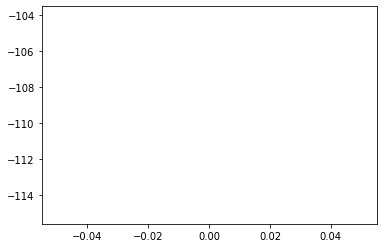

In [8]:
Es = []
E_pretrained = []
cnt = 0 
for dm_init, matrices, e_ref, dm_ref in dataloader_train:
    print(cnt)
    cnt += 1
    if cnt-1 not in select: continue
    print('Computing', cnt -1)
    dm_init = dm_init.to(DEVICE)
    e_ref = e_ref.to(DEVICE)
    dm_ref = dm_ref.to(DEVICE)
    matrices = {key:matrices[key].to(DEVICE) for key in matrices}
    
#     rand_dm = torch.randn(dm_init.size(),device=dm_init.device)*1e-3*dm_init*0
#     rand_dm[0] += rand_dm[0].T
    E_pretrained.append(matrices['e_pretrained'])
#     results = scf.forward(dm_init+rand_dm, matrices)
#     results = scf.forward(matrices['dm_realinit'], matrices)
    results = scf.forward(dm_init, matrices)
#     results = scf.forward(dm_init, matrices)
    E = results['E']
    Es.append(E.detach().cpu().numpy())
#     break
    
plot(np.array(Es).T)
print(np.array(Es)[:,-1])
print(np.array(Es)[:,-1]-np.array(Es)[:,-2])

In [150]:
dataloader_train.__iter__().__next__()[1]['e_pretrained']

tensor([-109.5178])

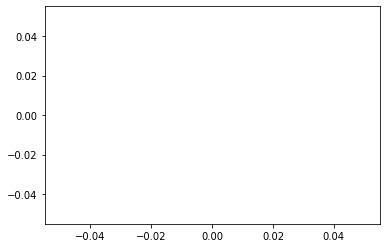

In [138]:
plot(np.array(Es).T)
# print(np.array(Es)[:,-1])
# print(np.array(Es)[:,-1]-np.array(Es)[:,-2])

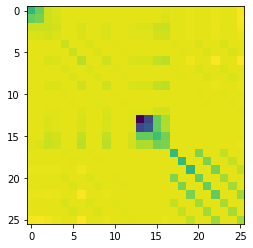

In [47]:
imshow(scf.vxc.detach().numpy())

In [87]:
for par in scf.parameters():
    par.requires_grad = False

In [97]:
xc.model_mult[0].requires_grad=True
xc.model_mult[1].requires_grad=True
scf.get_veff.a.requires_grad=True

In [98]:
optimizer = torch.optim.Adam([xc.model_mult[0],xc.model_mult[1],scf.get_veff.a],
                         lr=0.001,weight_decay=0)

In [99]:
scf.xc.train()
PRINT_EVERY=1
skip_steps = 15


# optimizer = torch.optim.Adam(scf.parameters(),
#                          lr=0.001,weight_decay=0)

# optimizer = torch.optim.SGD(scf.parameters(),
#                          lr=0.001,momentum=0.95)

MIN_RATE = 1e-7
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',
                                                       verbose=True, patience=int(10/PRINT_EVERY), 
                                                       factor=0.1, min_lr=MIN_RATE)

E_mult = 1e-4
AE_mult = 1
DM_mult = 10
# losses = {"E loss" : (partial(energy_loss, 
#                               loss = torch.nn.MSELoss(),
#                               skip_steps=skip_steps), E_mult),
#          "DM loss" : (partial(dm_loss,loss = torch.nn.MSELoss()), 0),
#          "rho loss" : (partial(rho_loss,loss = torch.nn.MSELoss()), 10000),
#          "MOE loss" : (partial(moe_loss,loss = torch.nn.MSELoss()), 0.01),
#          "GAP loss" : (partial(gap_loss,loss = torch.nn.MSELoss(),nhomo=4), 0)}

mol_losses = {"E" : (partial(energy_loss, 
                              loss = torch.nn.MSELoss(),
                              skip_steps=skip_steps), E_mult),
#          "DM loss" : (partial(dm_loss,loss = torch.nn.MSELoss()), 0),
             "rho" : (partial(rho_loss,loss = torch.nn.MSELoss()), 1e2),
             "Conv" :(partial(econv_loss,loss = torch.nn.MSELoss(),skip_steps=skip_steps), 1e-6)}
#          "IP": (partial(ip_loss,loss = torch.nn.MSELoss()), 0)}
atm_losses = {"E" : (partial(energy_loss, 
                              loss = torch.nn.MSELoss(),
                              skip_steps=skip_steps), E_mult),
               "Conv" :(partial(econv_loss,loss = torch.nn.MSELoss(),skip_steps=skip_steps), 1e-6)}
ae_loss = partial(ae_loss,loss = torch.nn.MSELoss())
chkpt_idx = 0
for epoch in range(10000):
    
    running_losses = {key:0 for key in mol_losses}
    running_losses['ae'] = 0 
    total_loss = 0
    atm_cnt = {}
    
    for molecule in molecules:
#         print(molecule)
        ref_dict = {}
        pred_dict = {}
        loss = 0
        for idx, data in enumerate(dataloader_train):
            if not idx in molecules[molecule]: continue
            print(idx)
            dm_init, matrices, e_ref, dm_ref = data
            dm_init = dm_init.to(DEVICE)
            e_ref = e_ref.to(DEVICE)
            dm_ref = dm_ref.to(DEVICE)
            matrices = {key:matrices[key].to(DEVICE) for key in matrices}
            dm_mix = matrices['dm_realinit']
    #         rand_dm = torch.randn(dm_init.size(),device=dm_init.device)*1e-3*dm_init*0
    #         rand_dm[0] += rand_dm[0].T
            mixing = torch.rand(1)
#             mixing = 0 
            results = scf(dm_init*(1-mixing) + dm_mix*mixing, matrices)
            results['dm_ref'] = dm_ref
            results['fcenter'] = matrices.get('fcenter',None)
            results['rho'] = matrices['rho']
            results['ao_eval'] = matrices['ao_eval']
            results['grid_weights'] = matrices['grid_weights']
            results['E_ref'] = e_ref
            results['mo_energy_ref'] = matrices['mo_energy']
            results['n_elec'] = matrices['n_elec']
            results['e_ip_ref'] = matrices['e_ip']
            results['mo_occ'] = matrices['mo_occ']
            if len(atoms[idx].positions) > 1:
                losses = mol_losses
            else:
                losses = atm_losses
            losses_eval = {key: losses[key][0](results)/a_count[idx] for key in losses}
            running_losses.update({key:running_losses[key] + \
                              losses_eval[key].item() for key in losses})
            ref_dict[''.join(atoms[idx].get_chemical_symbols())] = e_ref
            pred_dict[''.join(atoms[idx].get_chemical_symbols())] = results['E'][-1:]
            loss += sum([losses_eval[key]*losses[key][1] for key in losses])

        ael = ae_loss(ref_dict,pred_dict)
        running_losses['ae'] += ael.item()
        
        loss += AE_mult * ael
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    #   dot = get_dot()
    if epoch%PRINT_EVERY==0:
        running_losses = {key:np.sqrt(running_losses[key]/len(molecules))*1000 for key in running_losses}
        total_loss = np.sqrt(total_loss/len(molecules))*1000
        best_loss = min(total_loss, best_loss)
        if total_loss == best_loss:
            torch.save(xc.state_dict(), 'model{}.chkpt'.format(chkpt_idx%2))
            chkpt_idx += 1
        print('Epoch {} ||'.format(epoch), [' {} : {:.6f}'.format(key,val) for key, val in running_losses.items()], '|| total loss {:.6f}'.format(total_loss))
        scheduler.step(total_loss)
#     if stop_early: break

0
1
Epoch 0 || [' E : 1.583174', ' rho : 1.824794', ' Conv : 0.112509', ' ae : 0.000000'] || total loss 18.247950
0
1
Epoch 1 || [' E : 2.596227', ' rho : 1.740413', ' Conv : 0.032905', ' ae : 0.000000'] || total loss 17.404151
0
1
Epoch 2 || [' E : 3.502052', ' rho : 1.666289', ' Conv : 0.128840', ' ae : 0.000000'] || total loss 16.662928
0
1
Epoch 3 || [' E : 4.448710', ' rho : 1.604090', ' Conv : 0.131738', ' ae : 0.000000'] || total loss 16.040958
0
1


KeyboardInterrupt: 

In [23]:
xc.load_state_dict(torch.load('./log/2020-11-20_13:48:55.665640_0.chkpt'))

<All keys matched successfully>

In [28]:
scf.xc.evaluate()

energies = {'E_ref':[],'E_pred':[]}
densities = {'dm_ref' : [],'dm_pred':[]}
mo_energies = {'mo_ref':[],'mo_pred':[]}
for data in dataloader:
    dm_init, matrices, e_ref, dm_ref = data
    dm_init = matrices['dm_realinit']
    dm_init.requires_grad = False
    dm_init = dm_init.to(DEVICE)
    e_ref = e_ref.to(DEVICE)
    dm_ref = dm_ref.to(DEVICE)
    matrices = {key:matrices[key].to(DEVICE) for key in matrices}
    results = scf(dm_init, matrices)
    E = results['E']
    dm = results['dm']
    energies['E_ref'].append(e_ref.detach().cpu().numpy())
    energies['E_pred'].append(E.detach().cpu().numpy()[-1])
    densities['dm_ref'].append(dm_ref.detach().cpu().numpy())
    densities['dm_pred'].append(dm.detach().cpu().numpy())
    mo_energies['mo_ref'].append(matrices['mo_energy'].detach().cpu().numpy().flatten())
    mo_energies['mo_pred'].append(results['mo_energy'].detach().cpu().numpy())

In [29]:
ref_dict = {''.join(a.get_chemical_symbols()): e for a,e in zip(atoms, energies['E_ref'])}
pred_dict = {''.join(a.get_chemical_symbols()): e for a,e in zip(atoms, energies['E_pred'])}

In [30]:
np.std(np.array(energies['E_ref']).flatten()[:-1] - np.array(energies['E_pred'])[:-1])

0.08992083617722813

/gpfs/home/smdick/miniconda3/envs/torch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/gpfs/home/smdick/miniconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.0


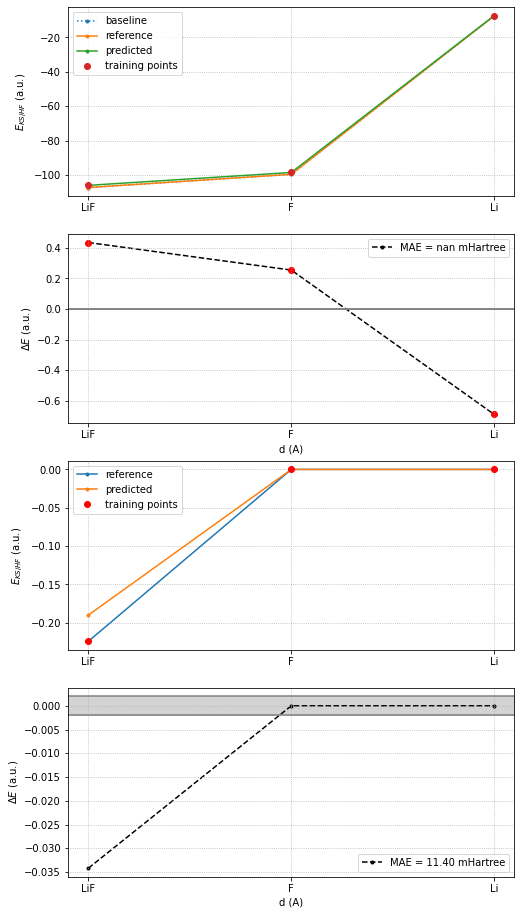

In [31]:
figsize(8,16)
subplot(4,1,1)
plot(distances,E_base, label='baseline',marker='.', ls=':')
plot(distances,energies['E_ref'],label='reference',marker='.')
plot(distances,energies['E_pred'],label='predicted',marker='.')
plot(np.array(distances)[train_idx],np.array(energies['E_pred'])[train_idx],label='training points',ls='',marker='o')
xticks(distances, [str(a.symbols) for a in atoms])
ylabel('$E_{KS/HF}$ (a.u.)')
grid(ls=':')
legend()
subplot(4,1,2)

error = np.array(energies['E_pred'])-np.array(energies['E_ref'])[:,0]
error_test = [e for i,e in enumerate(error) if not i in train_idx]
error_train = [e for i,e in enumerate(error) if  i in train_idx]
error_test -= np.mean(error)

plot(distances,np.array(energies['E_pred'])-np.array(energies['E_ref'])[:,0]-np.mean(error_train),label='MAE = {:.2f} mHartree'.format(np.mean(np.abs(error_test))*1000),
     marker='.',zorder=1, color='black',ls='--')

# plot(distances,np.array(E_base)-np.array(energies['E_ref'])[:,0],label='reference',zorder=1, color='black',ls=':')

error_base = np.array(E_base)-np.array(energies['E_ref'])[:,0]
print(1000*np.mean(np.abs(error_base - np.mean(error_base))))
plot(np.array(distances)[train_idx],(np.array(energies['E_pred'])-np.array(energies['E_ref'])[:,0]-np.mean(error_train))[train_idx],
     ls='',marker='o',zorder=1, color='red')
xticks(distances, [str(a.symbols) for a in atoms])
axhline(0.002,color='grey')
axhline(-0.002,color='grey')
xmin, xmax = xlim()
ylabel('$\Delta E $ (a.u.)')
xlabel('d (A)')
legend()
# yscale('log')?
fill_between([xmin,xmax],-0.002,0.002,zorder=0,color='lightgrey')
xlim(xmin,xmax)
grid(ls=':')

ref_dict = {''.join(a.get_chemical_symbols()): e for a,e in zip(atoms, energies['E_ref'])}
pred_dict = {''.join(a.get_chemical_symbols()): e for a,e in zip(atoms, energies['E_pred'])}

subplot(4,1,3)


ae_ref = np.array(list(atomization_energies(ref_dict).values()))
ae_pred = np.array(list(atomization_energies(pred_dict).values()))
plot(distances,ae_ref, label='reference',marker='.')
plot(distances,ae_pred, label='predicted',marker='.')
plot(np.array(distances)[train_idx],ae_ref[train_idx],label='training points',ls='',marker='o',color='red')
xticks(distances, [str(a.symbols) for a in atoms])
ylabel('$E_{KS/HF}$ (a.u.)')
grid(ls=':')
legend()

subplot(4,1,4)
error = np.array(ae_ref).flatten()-np.array(ae_pred).flatten()


plot(distances,error,label='MAE = {:.2f} mHartree'.format(np.mean(np.abs(error))*1000),
     marker='.',zorder=1, color='black',ls='--')

# plot(distances,np.array(E_base)-np.array(energies['E_ref'])[:,0],label='reference',zorder=1, color='black',ls=':')

# error_base = np.array(E_base)-np.array(energies['E_ref'])[:,0]
# print(1000*np.mean(np.abs(error_base - np.mean(error_base))))
# plot(np.array(distances)[train_idx],(np.array(ae_pred)-np.array(ae_ref)-np.mean(error_train))[train_idx],
#      ls='',marker='o',zorder=1, color='red')
xticks(distances, [str(a.symbols) for a in atoms])
axhline(0.002,color='grey')
axhline(-0.002,color='grey')
xmin, xmax = xlim()
ylabel('$\Delta E $ (a.u.)')
xlabel('d (A)')
legend()
# yscale('log')?
fill_between([xmin,xmax],-0.002,0.002,zorder=0,color='lightgrey')
xlim(xmin,xmax)
grid(ls=':')

# savefig('pbe_reprod.pdf',bbox_inches='tight')

In [33]:
INDEX=3

In [34]:
select

[0, 1, 2, 3, 10, 13, 14, 15, 16]

converged SCF energy = -15.8628009192906
converged SCF energy = -15.8650512532512


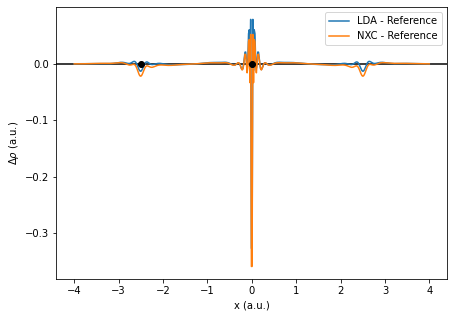

In [35]:
pos = atoms[INDEX].positions
spec = atoms[INDEX].get_chemical_symbols()
mol_input = [[s, p] for s, p in zip(spec, pos)]

mol = gto.M(atom=mol_input, basis='6-311++G(3df,2pd)')
mol_ref = gto.M(atom=mol_input, basis='aug-ccpvqz')
mf = dft.RKS(mol)
mf.xc = 'PBE'
mf.grids.level = 5
mf.kernel()
dm_lda = mf.make_rdm1()
mf_ref = dft.RKS(mol_ref)
mf_ref.xc = 'PBE'
mf_ref.grids.level = 5
mf_ref.kernel()

coords = np.zeros([500,3])

coords[:,2] = np.linspace(-4,4,500)

mf.grids.coords = coords
mf.grids.weights = np.zeros(500)

# rho_base = get_rho(mf, mol = mol, dm = DM_base[INDEX], grids = mf.grids)
# rho_ref = mf_ref._numint.get_rho(mol = mol_ref, dm = DM_ref[0], grids = mf.grids)
rho_ref = get_rho(mf, mol = mol_ref, dm = np.load('ref/aug-ccpvqz/{}.dm.npy'.format(select[INDEX])), grids = mf.grids)
# rho_ref = get_rho(mf, mol = mol_ref, dm = DM_ref[INDEX], grids = mf.grids)
rho_lda = get_rho(mf, mol = mol, dm = dm_lda, grids = mf.grids)
dm_pred =  densities['dm_pred'][INDEX]
if dm_pred.ndim ==3:
    dm_pred = np.sum(dm_pred, axis=0)
rho_pred = get_rho(mf, mol = mol, dm = dm_pred, grids = mf.grids)
figsize(7,5)
axhline(0, color='black')
plot(mf.grids.coords[:,2], -rho_ref.round(5) + rho_lda.round(5),label='LDA - Reference')
plot(mf.grids.coords[:,2], -rho_ref.round(5) + rho_pred.round(5),label='NXC - Reference')
plot([pos[1,-1]/Bohr,pos[0,-1]/Bohr],[0,0],ls='',marker='o',color='black')
xlabel('x (a.u.)')
ylabel('$\\Delta\\rho$ (a.u.)')
legend()


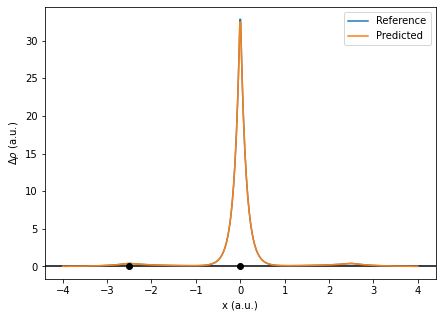

In [37]:
figsize(7,5)
axhline(0, color='black')
plot(mf.grids.coords[:,2], rho_ref.round(5) ,label='Reference')
plot(mf.grids.coords[:,2], rho_pred.round(5),label='Predicted')
plot([pos[1,-1]/Bohr,pos[0,-1]/Bohr],[0,0],ls='',marker='o',color='black')
xlabel('x (a.u.)')
ylabel('$\\Delta\\rho$ (a.u.)')
legend()

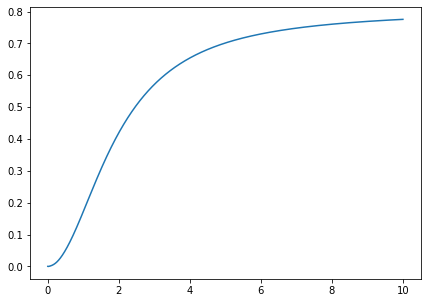

In [168]:
plot(torch.arange(0,10,0.001), scf.xc.grid_models[0](torch.stack([torch.log(torch.arange(0,10,0.001)+1e-8)]*2,dim=-1)).detach().numpy())
# xscale('log')

In [169]:
x = XC_L(device=DEVICE,n_input=1, n_hidden=64,spin_scaling=True, use=[1], lob=True) # PBE_X
x.load_state_dict(torch.load('pbe_x_64_s_lob',map_location=torch.device('cpu')))

c = XC_L(device=DEVICE,n_input=3, n_hidden=64, spin_scaling=False)
c.load_state_dict(torch.load('pbe_c_64',map_location=torch.device('cpu')))

c = C_L(device=DEVICE,n_input=3, n_hidden=32, use=[1,2])
c.load_state_dict(torch.load('pbe_c_32_scaling',map_location=torch.device('cpu')))

pbe_xc = XC(grid_models=[x, c], heg_mult=True, level=2)
# xc = XC(grid_models=[c], heg_mult=True, level=2)
scf_pbe = SCF(nsteps=10, xc=pbe_xc, exx=False,alpha=0.4)


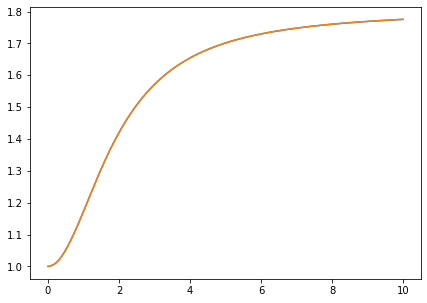

In [170]:
plot(torch.arange(0.001,10,0.001), (1+scf.xc.grid_models[0](torch.stack([torch.log(torch.arange(0.001,10,0.001)+1e-8)]*2,dim=-1))).detach().numpy())
plot(torch.arange(0.001,10,0.001), (1+scf_pbe.xc.grid_models[0](torch.stack([torch.log(torch.arange(0.001,10,0.001)+1e-8)]*2,dim=-1))).detach().numpy())

# xscale('log')

In [6]:
from pyscf import gto, dft, scf
import pylibnxc

In [7]:
import os

In [3]:
xc.forward = xc.eval_grid_models
traced = torch.jit.trace(xc,torch.rand([10,9]))

torch.jit.save(traced, "models/PBE_GGA/xc")

NameError: name 'xc' is not defined

In [8]:
os.environ['NXC_MODELPATH'] = '/home/sebastian/Research/NEURALXC/torch_pyscf/models'

In [20]:
# all_atoms =[Atoms('H2', positions=np.array([[0,0,-0.35],[0,0,0.35]])*mult) for mult in [0.7,0.85,1.05,1.15,1.25,1.6,1.8,2.2,2.5,3.5,5,7] ]
all_atoms =[Atoms('LiF', positions=np.array([[0,0,-0.75],[0,0,0.75]])*mult) for mult in [0.85,1.05,1.15,1.25,1.6,1.8,2.2]]

In [21]:
def get(atoms, xc='',nxc=''):
    pos = atoms.positions
    spec = atoms.get_chemical_symbols()
    mol_input = [[s, p] for s, p in zip(spec, pos)]
    mol = gto.M(atom=mol_input, basis='6-311++G**')
    mf = pylibnxc.pyscf.RKS(mol,nxc=nxc)
    if xc:
        mf.xc = xc
    mf.grids.level = 4
    mf.kernel()
    return mf.e_tot

In [22]:
pbe = np.array([get(a,xc='PBE') for a in all_atoms])
ref = np.array([get(a,xc='wb97mv') for a in all_atoms])
nxc = np.array([get(a,xc='',nxc='PBE_GGA') for a in all_atoms])
# nxc = np.array(energies['E_pred'][:-1])
results = {'PBE':pbe,'REF':ref,'NXC':nxc}
for r in results:
    results[r] -= np.min(results[r])

converged SCF energy = -107.290680776981
converged SCF energy = -107.339624500343
converged SCF energy = -107.336069024133
converged SCF energy = -107.326262682645
converged SCF energy = -107.281972315838
converged SCF energy = -107.259301119231
converged SCF energy = -107.224655091986
converged SCF energy = -107.430039097988
converged SCF energy = -107.478341428894
converged SCF energy = -107.474330836177
converged SCF energy = -107.464029623189
converged SCF energy = -107.417830594582
converged SCF energy = -107.393992729768
converged SCF energy = -107.356208961905
converged SCF energy = -107.791572070404
converged SCF energy = -107.836755744843
converged SCF energy = -107.832080775297
converged SCF energy = -107.821451031806
converged SCF energy = -107.775563480679
converged SCF energy = -107.752420033082
converged SCF energy = -107.717134760288


In [23]:
r = np.array([a.get_distance(0,1) for a in all_atoms])

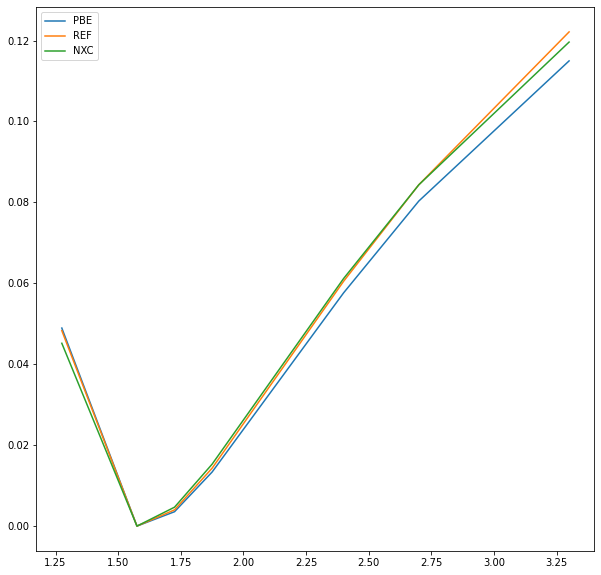

In [25]:
figsize(10,10)
for res in results:
    plot(r, results[res], label=res)
legend()